Assignment 1: ML Data Cleaning and Feature Selection

Akshit Kallepalli - 002771603

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005. It contains 25 variables.


**Importing Libraries and dataset.**

In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
#Importing our dataset
url = "https://raw.githubusercontent.com/akshit-kallepalli/INFO-6105_Credit-Card-Approval-Prediction/main/UCI_Credit_Card.csv"
df = pd.read_csv(url)

**Understanding the dataset and datatypes.**

In [ ]:
# Displaying the first few rows of the dataset
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0       0.0                           1  
1    1000.0       0.0    2000.0                           1  
2    1000.0    1000.0    5000.0                           0  
3    1100.0    1069.0    1000.0                           0  
4    9000.0     689.0     679.0                           0  

[5 rows x 25 columns]

In [ ]:
# Getting a summary of the dataset
# Checking if datatypes are categorical or numerical.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

Here, we can see that all our data types are numerical i.e either int or float.

**Checking for missing values.**

In [ ]:
#Checking for missing values in the dataset
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

Here, we can see that there's no missing data. Therefore, there is no need to impute any values.

**Analysing Independent variables for target prediction**

Our target variable is default.payment.next.month.
1 indicates that payment will be defaulted.
0 indicates that payment wont be defaulted.

In [ ]:
#Changing target variable name for easy use
df.rename(columns={'default.payment.next.month':'def_pay'}, inplace=True)

1. Checking the correlation coefficient between each independent variable and the target variable.

In [ ]:
# Extracting the absolute correlation values of the target variable ('def_pay') with all other variables,
# and sorting them in descending order.
correlation_matrix = df.corr()
target_correlation = correlation_matrix['def_pay'].abs().sort_values(ascending=False)
print(target_correlation)


def_pay      1.000000
PAY_0        0.324794
PAY_2        0.263551
PAY_3        0.235253
PAY_4        0.216614
PAY_5        0.204149
PAY_6        0.186866
LIMIT_BAL    0.153520
PAY_AMT1     0.072929
PAY_AMT2     0.058579
PAY_AMT4     0.056827
PAY_AMT3     0.056250
PAY_AMT5     0.055124
PAY_AMT6     0.053183
SEX          0.039961
EDUCATION    0.028006
MARRIAGE     0.024339
BILL_AMT1    0.019644
BILL_AMT2    0.014193
BILL_AMT3    0.014076
ID           0.013952
AGE          0.013890
BILL_AMT4    0.010156
BILL_AMT5    0.006760
BILL_AMT6    0.005372
Name: def_pay, dtype: float64


Here, we can see that variables like monthly payments and limit balance will help us in prediction.

2. Univariate Analysis

In [ ]:
df.groupby('def_pay')['AGE'].describe()

count       mean       std   min   25%   50%   75%   max
def_pay                                                            
0        23364.0  35.417266  9.077355  21.0  28.0  34.0  41.0  79.0
1         6636.0  35.725738  9.693438  21.0  28.0  34.0  42.0  75.0

In [ ]:
df.groupby('def_pay')['EDUCATION'].describe()

count      mean       std  min  25%  50%  75%  max
def_pay                                                      
0        23364.0  1.841337  0.806780  0.0  1.0  2.0  2.0  6.0
1         6636.0  1.894665  0.728096  1.0  1.0  2.0  2.0  6.0

In [ ]:
df.groupby('def_pay')['MARRIAGE'].describe()

count      mean       std  min  25%  50%  75%  max
def_pay                                                      
0        23364.0  1.558637  0.520794  0.0  1.0  2.0  2.0  3.0
1         6636.0  1.528029  0.525433  0.0  1.0  2.0  2.0  3.0

3. Feature Importance

In [ ]:
from sklearn.ensemble import RandomForestRegressor

X = df.drop('def_pay', axis=1)
y = df['def_pay']

# Creating an instance of the RandomForestRegressor model.
model = RandomForestRegressor()

# Fitting the model using the feature matrix (X) and target variable (y) to learn the relationships in the data.
model.fit(X, y)

feature_importances = model.feature_importances_

# Sorting the indices of the features in descending order based on their importances.
sorted_indices = feature_importances.argsort()[::-1]

print(sorted_indices)


[ 6  0  5 12  1 20 19 23 18 17 22 13 21 14 15 16  7  3  4 11 10  8  9  2]


sorted_indices will give us the indices of features sorted by importance. Higher importance scores indicate more influential variables.

### Q1. Which independent variables are useful to predict a target?

We aim to guess if a person will have trouble paying next month or not i.e face default.
So, from the above analysis, we can understand that the prediction mostly depends on the independent variables like previous repayment history, Limit Balance, Age, Sex, Education & Marriage.

### Q2. Which independent variable have missing data? How much?

We can observe that none of these variables have any missing data.


### Q3. What are the distributions of the predictor variables?

We'll display histograms along with Kernel Density Estimation (KDE) curves to visualize the probability distribution.

<Axes: xlabel='AGE', ylabel='Count'>

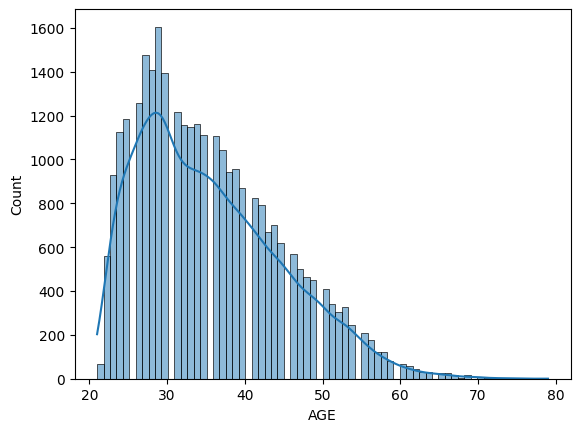

In [ ]:
#For Age
sns.histplot(df.AGE, kde=True)

From the above graph, we can observe that there are more people in the age range of 20 to 40 years. Therefore, we will include the age feature.

<Axes: xlabel='LIMIT_BAL', ylabel='Count'>

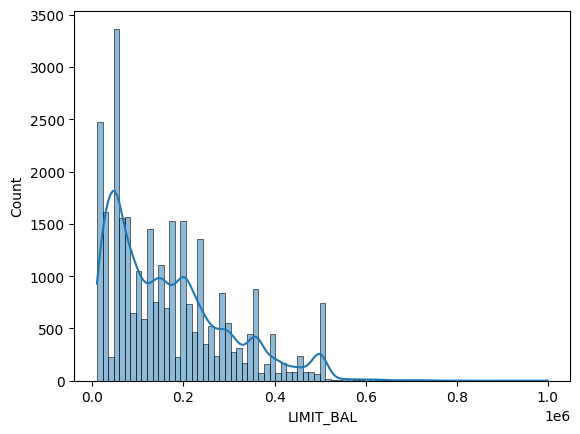

In [ ]:
sns.histplot(df.LIMIT_BAL, kde=True)

<Axes: xlabel='EDUCATION', ylabel='Count'>

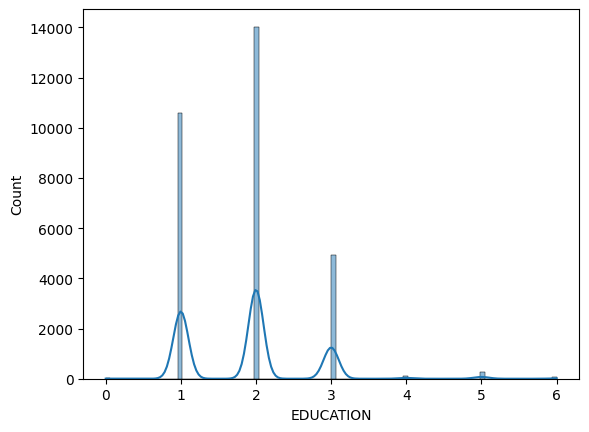

In [ ]:
sns.histplot(df.EDUCATION, kde=True)

<Axes: xlabel='MARRIAGE', ylabel='Count'>

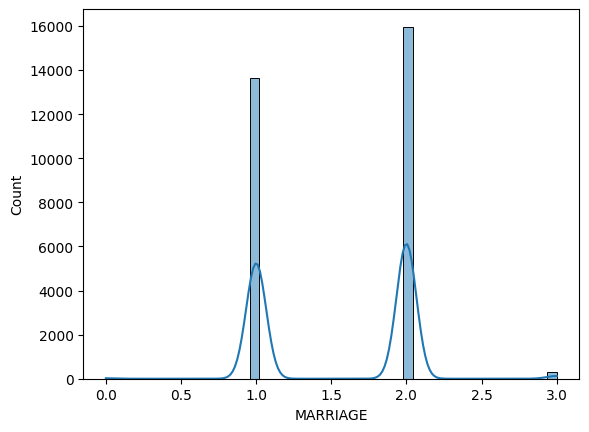

In [ ]:
sns.histplot(df.MARRIAGE, kde=True)

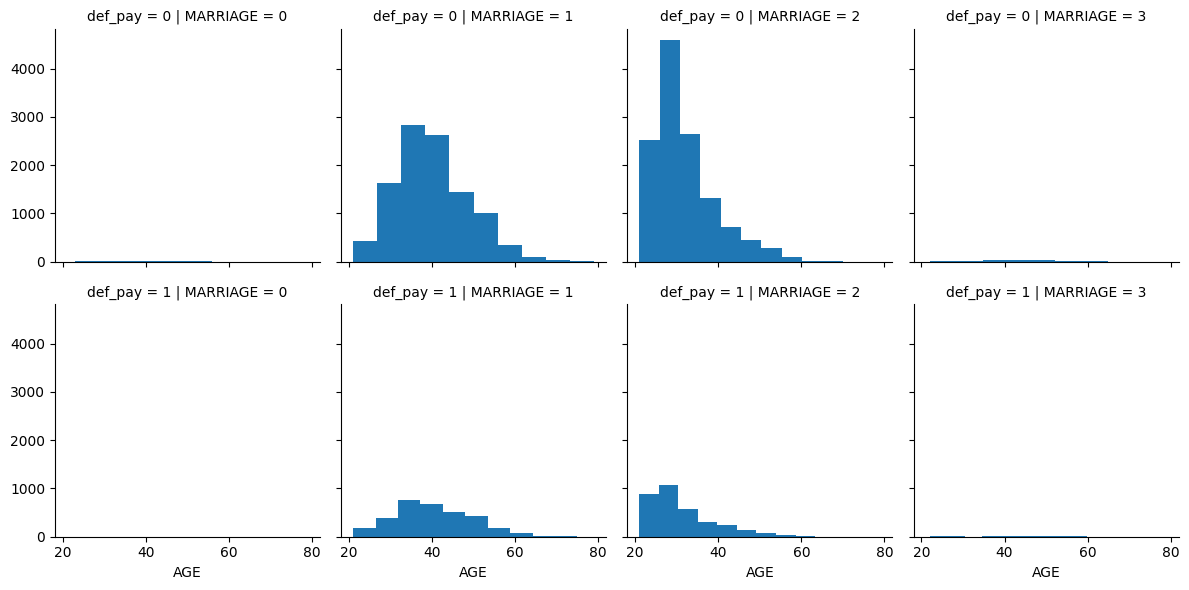

In [ ]:
g = sns.FacetGrid(df, row='def_pay', col='MARRIAGE')
g = g.map(plt.hist, 'AGE')
plt.show()

Based on the data above, it's evident that married people between the ages of 30-50 and unmarried people between 20-30 are more likely to face default.

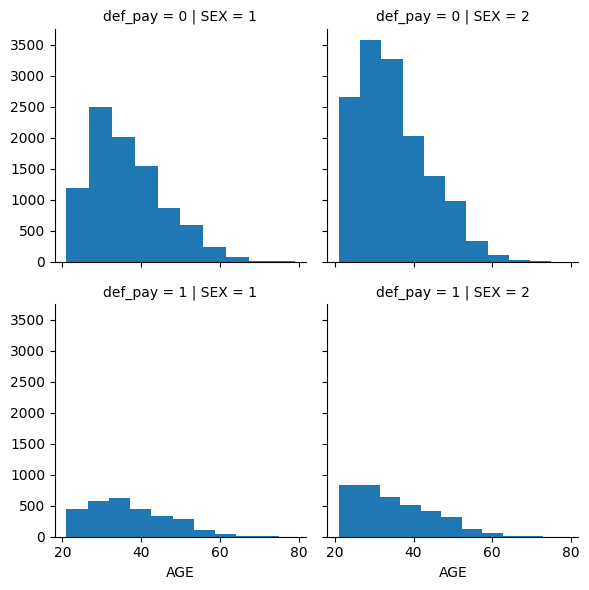

In [ ]:
g = sns.FacetGrid(df, row='def_pay', col='SEX')
g = g.map(plt.hist, 'AGE')

Based on the graphs above, it's evident that females in the age group of 20 to 30 are more likely to face default compared to males in the same age group and individuals in other age brackets.

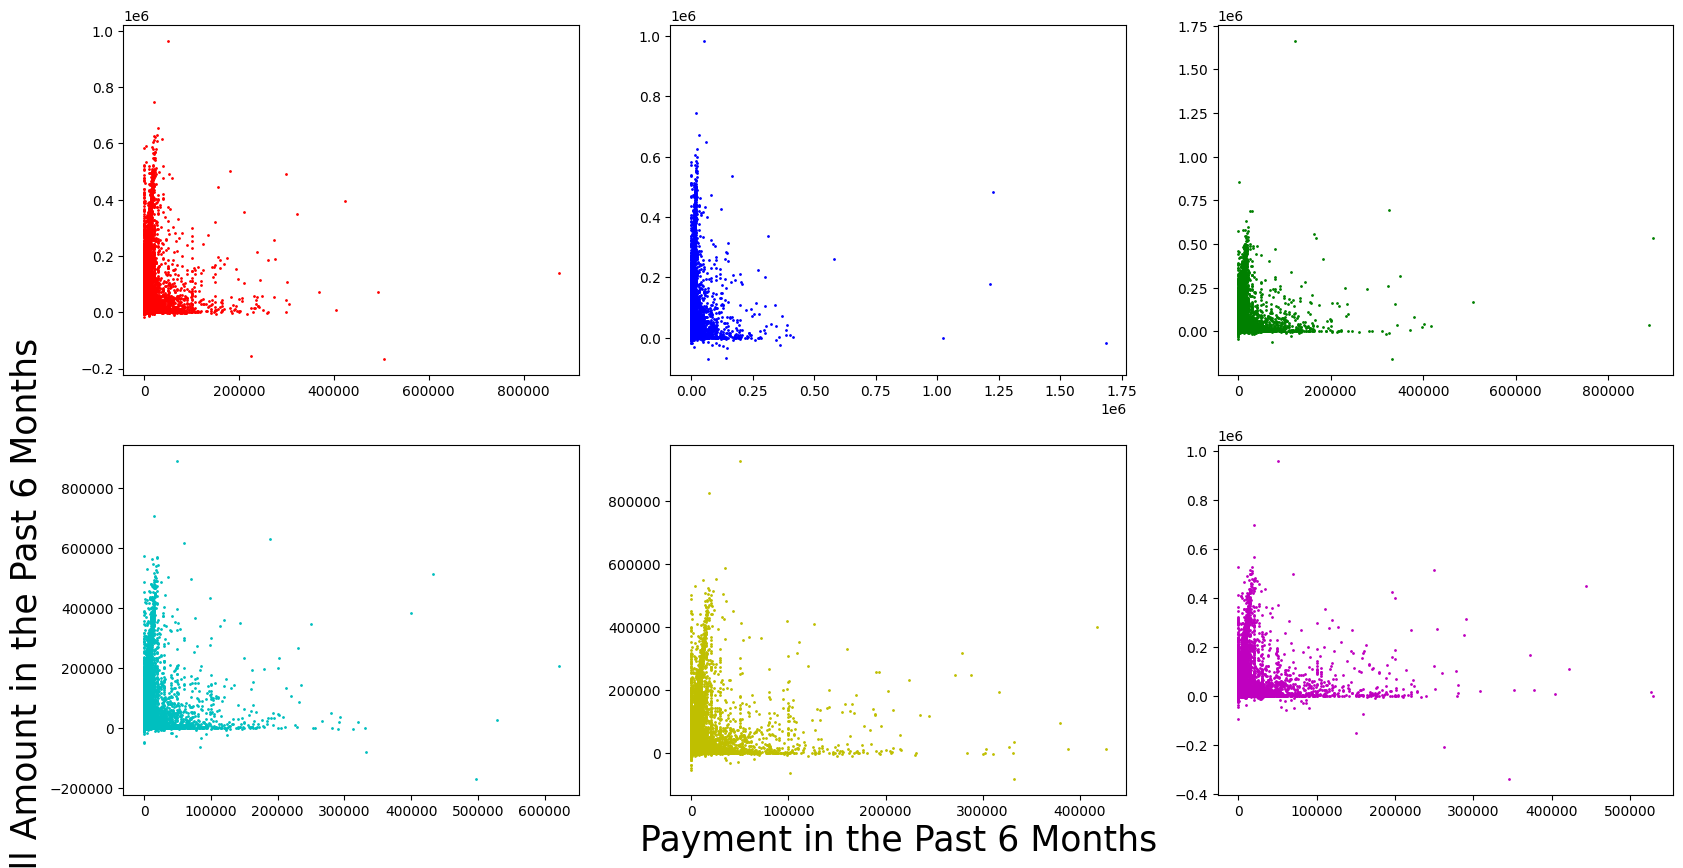

In [ ]:
#le6 means 10^6
#Plotting graphs for bill vs payments with y-axis representing billed amount and x-axis representing actual paid amount

plt.subplots(figsize=(20,10))

plt.subplot(231)
plt.scatter(x=df.PAY_AMT1, y=df.BILL_AMT1, c='r', s=1) #'c' denotes colour and 's' denotes size of data points

plt.subplot(232)
plt.scatter(x=df.PAY_AMT2, y=df.BILL_AMT2, c='b', s=1)

plt.subplot(233)
plt.scatter(x=df.PAY_AMT3, y=df.BILL_AMT3, c='g', s=1)

plt.subplot(234)
plt.scatter(x=df.PAY_AMT4, y=df.BILL_AMT4, c='c', s=1)
plt.ylabel("Bill Amount in the Past 6 Months", fontsize=25)

plt.subplot(235)
plt.scatter(x=df.PAY_AMT5, y=df.BILL_AMT5, c='y', s=1)
plt.xlabel("Payment in the Past 6 Months", fontsize=25)

plt.subplot(236)
plt.scatter(x=df.PAY_AMT6, y=df.BILL_AMT6, c='m', s=1)

plt.show()

The visualization above illustrates that a significant number of people have high bill amounts, but the corresponding payments made are very low. This is indicated by the dense cluster of data points near the Y-axis and close to zero on the X-axis.

**Dependency check on predictor variables**

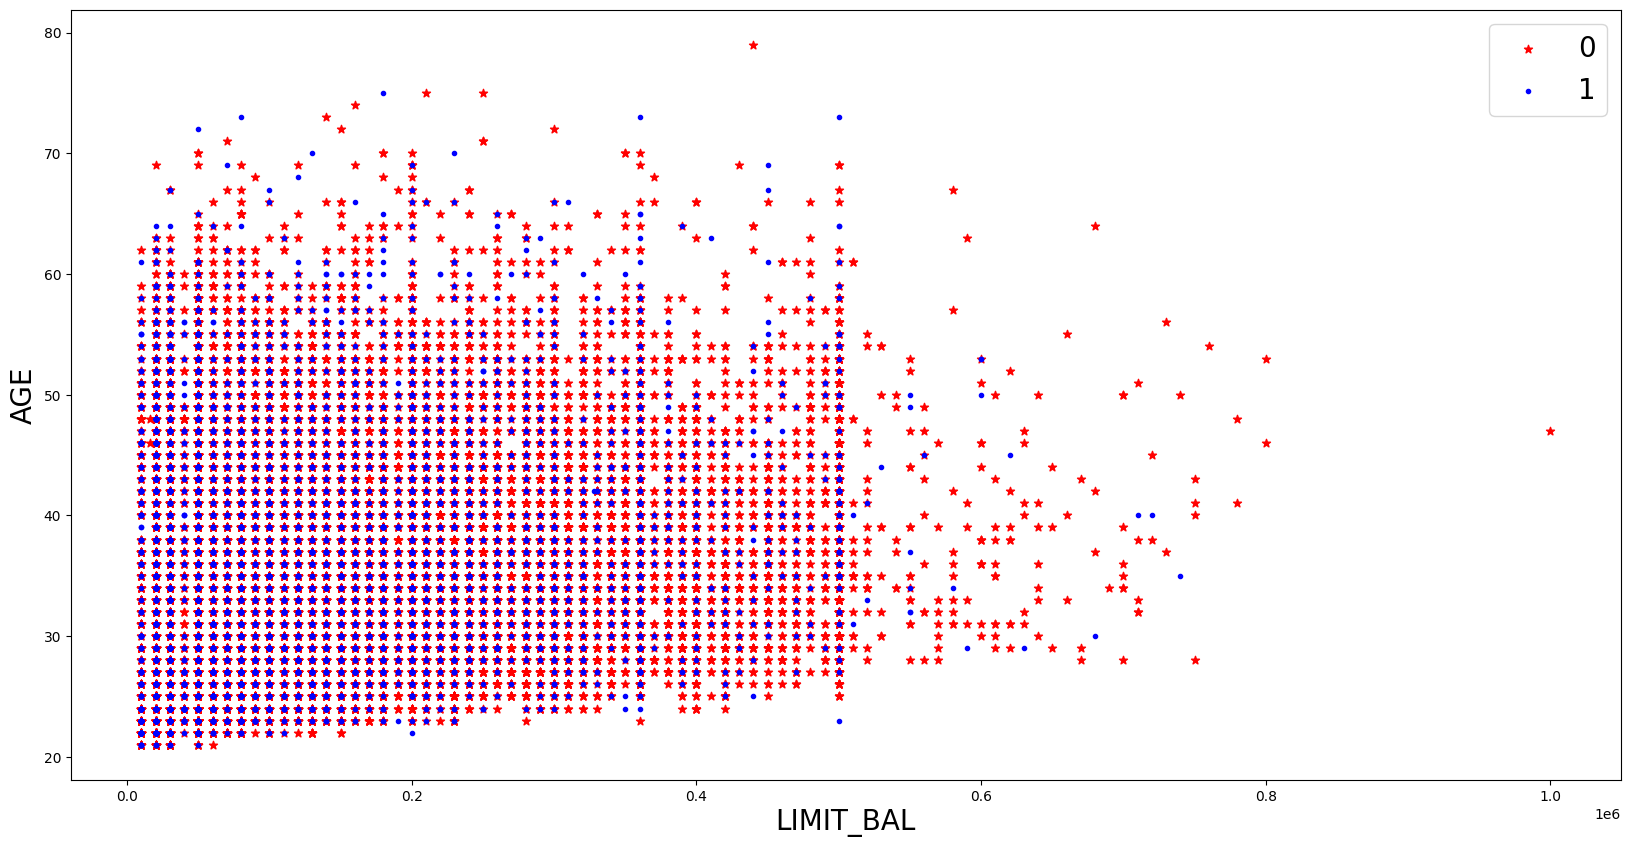

In [ ]:
#le6 means 10^6
#Considering x,y values for correlation between age & limit_bal

y1 = df.AGE[df["def_pay"] == 0]
y2 = df.AGE[df["def_pay"] == 1]
x1 = df.LIMIT_BAL[df["def_pay"] == 0]
x2 = df.LIMIT_BAL[df["def_pay"] == 1]

fig,ax = plt.subplots(figsize=(20,10))
plt.scatter(x1,y1, c="r", marker="*", label='0')
plt.scatter(x2,y2, c="b", marker=".", label='1')
plt.xlabel("LIMIT_BAL", fontsize=20)
plt.ylabel("AGE", fontsize=20)
plt.legend(loc='upper right', fontsize=20) #Displaying the labels of data points
plt.show()

Based on the above data, it appears that there is no clear correlation between age and the credit limit provided, as there is a mixed variation across all age groups.

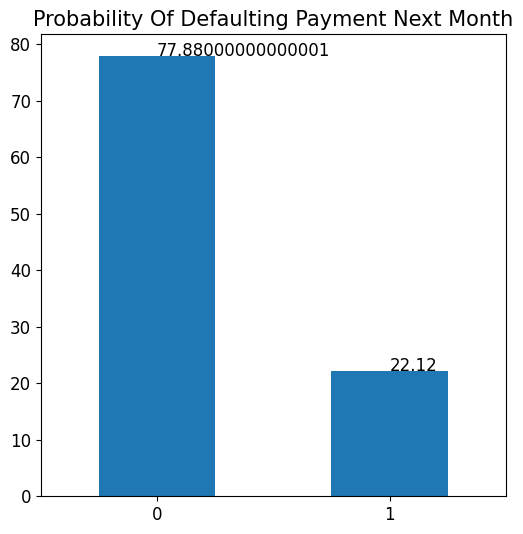

In [ ]:
# Creating a bar chart to visualize the Probability of Defaulting Payment Next Month based on 'def_pay' column

def_cnt = (df.def_pay.value_counts(normalize=True)*100)
def_cnt.plot.bar(figsize=(6,6))
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title("Probability Of Defaulting Payment Next Month", fontsize=15)
for x,y in zip([0,1],def_cnt):
    plt.text(x,y,y,fontsize=12)
plt.show()

Based on the bar graph, it is evident that approximately 22% of the individuals are at risk of defaulting on their payments next month.

**Correlation Matrix & pair plot to check the colinearity**

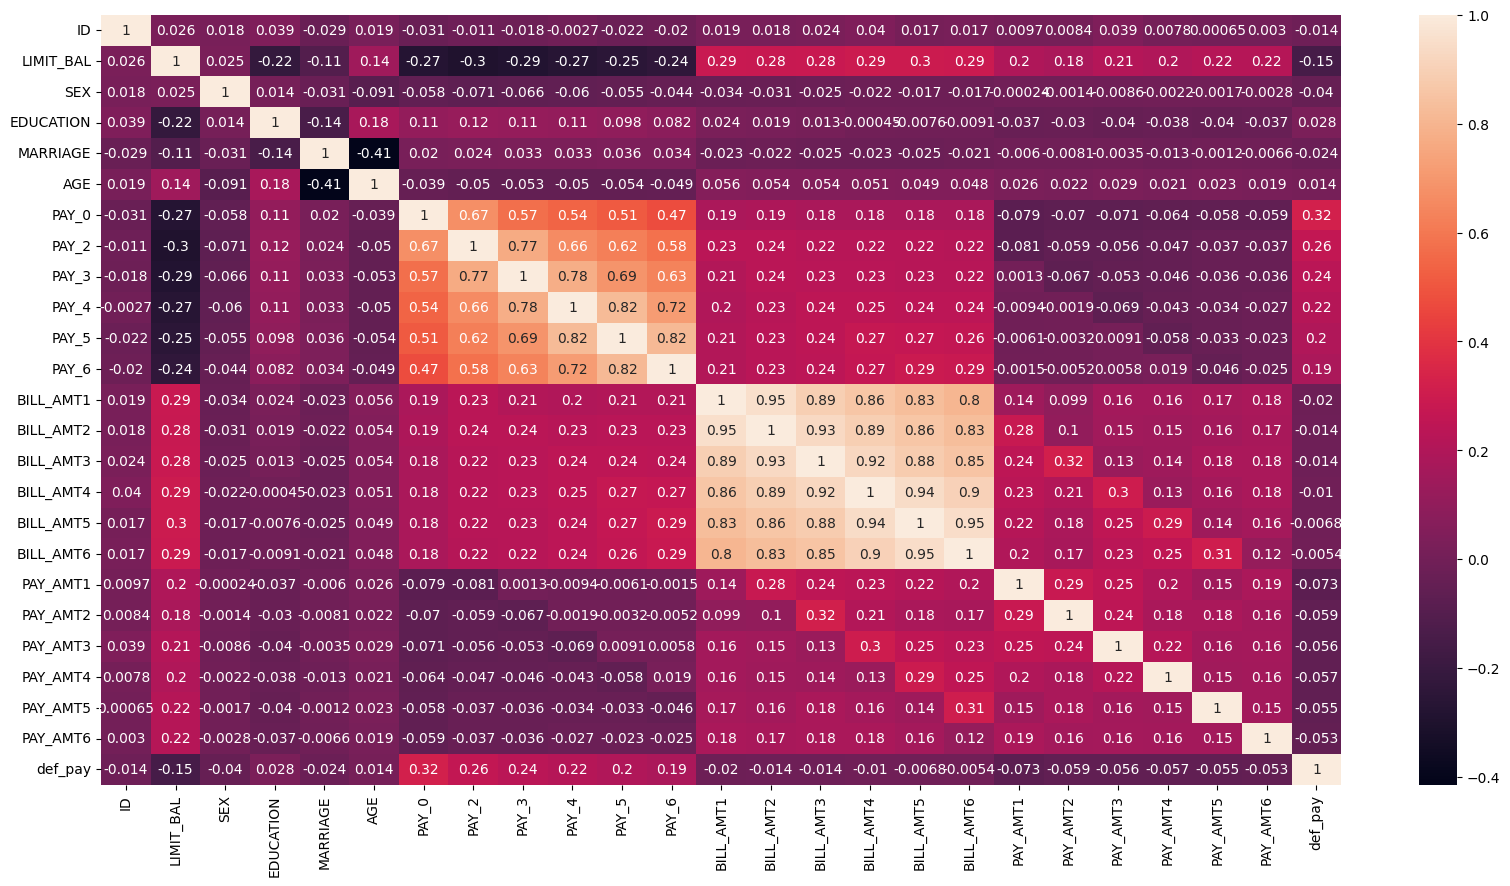

In [ ]:
plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

Based on the information above, it's apparent that default risk is correlated with past repayment behavior, indicating collinearity.

From the pairplot above, it's evident that payments made in previous months exhibit collinearity.

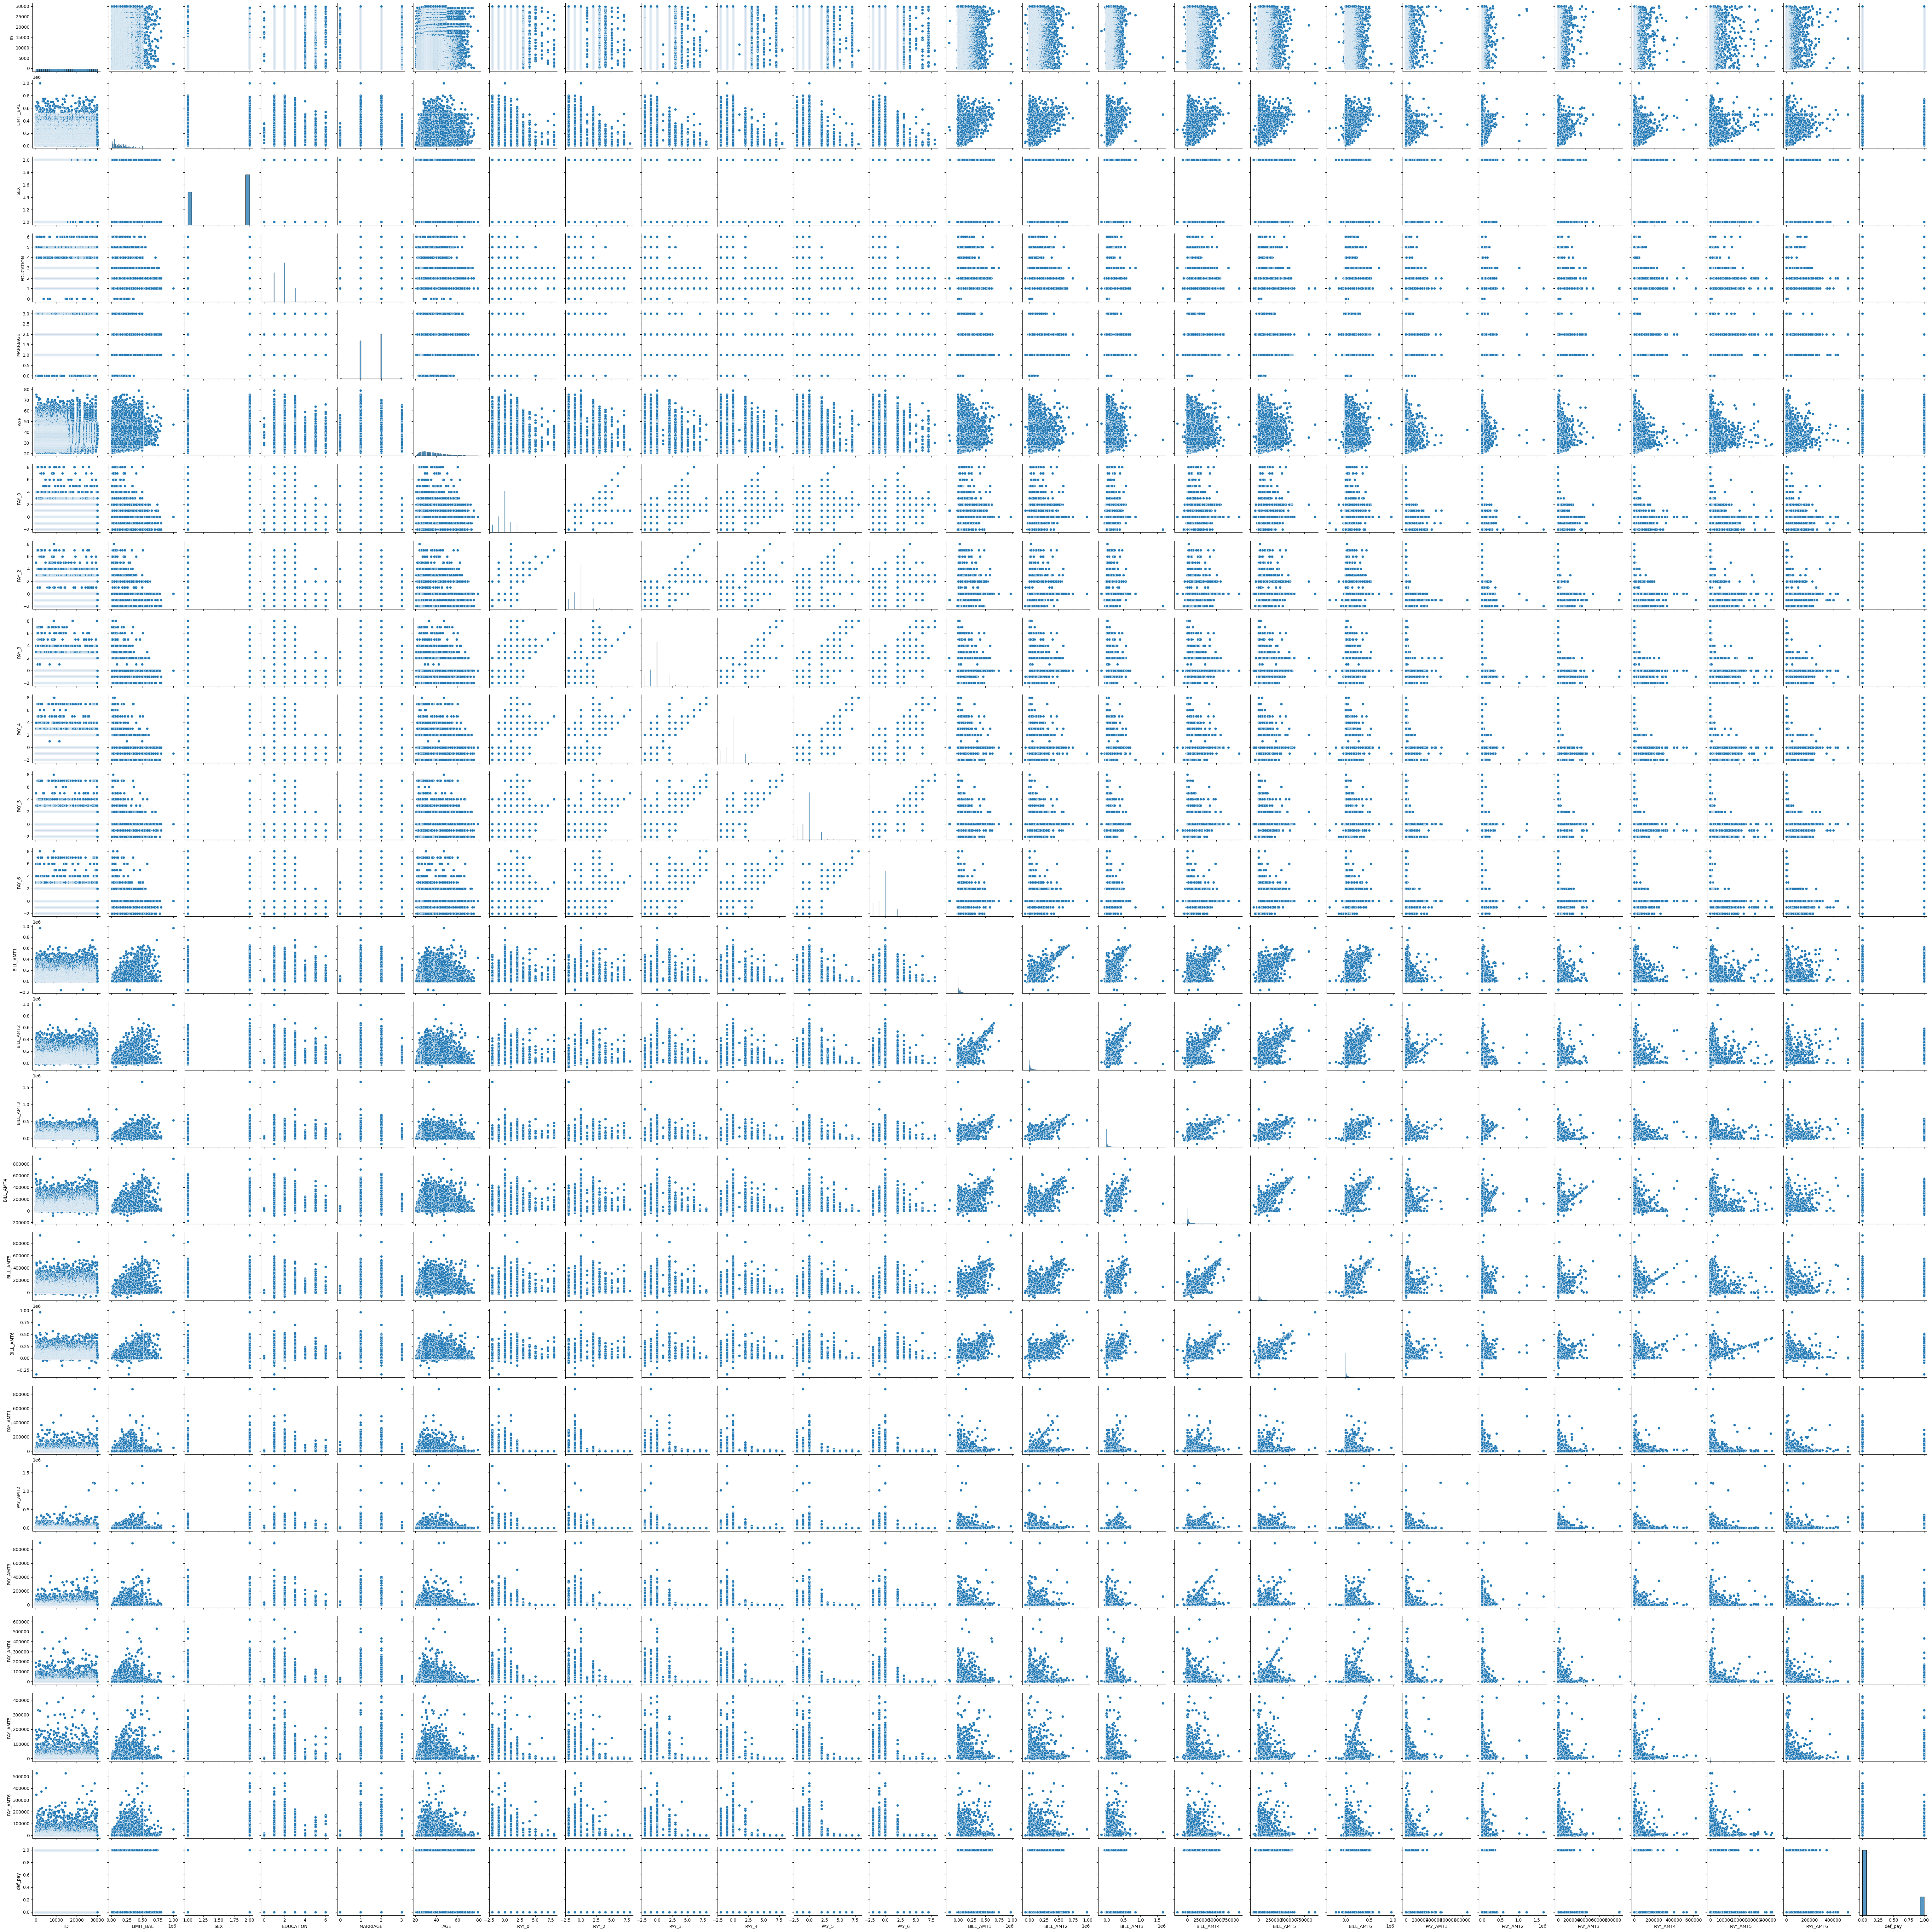

In [ ]:
sns.pairplot(df)

The pairplot above reveals a clear collinearity among payments made in previous months.

### Q4. Are the predictor variables independent of all the other predictor variables?

Upon careful examination of the data, it is evident that the predictor variables Repayment (PAY_AMT1 - PAY_AMT6) exhibit interdependence. On the other hand, variables such as education, marriage, sex, and limit_bal appear to be independent of one another.

**Range of predictor variables**

In [ ]:
#Extracting the ranges of varibles

df.describe()

ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802      1.197186      1.196868      1.169139   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   30000.000000   30000.000000   30000.000000   30000.000000   
mean   ...   43262.948967   40311.400967   38871.760400    5663.580500   
std    ...   64332.856134   60797.155770   59554.107537   16563.280354   
min    ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%    ...    2326.750000    1763.000000    1256.000000    1000.000000   
50%    ...   19052.000000   18104.500000   17071.000000    2100.000000   
75%    ...   54506.000000   50190.500000   49198.250000    5006.000000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6       def_pay  
count   30000.000000  30000.000000  
mean     5215.502567      0.221200  
std     17777.465775      0.415062  
min         0.000000      0.000000  
25%       117.750000      0.000000  
50%      1500.000000      0.000000  
75%      4000.000000      0.000000  
max    528666.000000      1.000000  

[8 rows x 25 columns]

In [ ]:
#Checking the z-score of predictor variables

import scipy.stats as stats

data = pd.DataFrame(np.random.randint(0, 10, size= (30000, 11)), columns=['AGE', 'SEX', 'EDUCATION', 'MARRIAGE', 'LIMIT_BAL', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'])
data.apply(stats.zscore)

AGE       SEX  EDUCATION  MARRIAGE  LIMIT_BAL     PAY_1     PAY_2  \
0     -0.521238  1.215075   0.164532  1.568222  -1.214366  0.178467  0.166341   
1      1.565150  1.561388   0.164532  1.220596  -1.561327 -0.517581  0.166341   
2     -0.521238 -1.209118   0.513214  0.872970   1.214366  0.178467 -1.227874   
3      1.217419  0.522448   1.210579  1.220596   0.867404 -1.213629  0.863449   
4      1.565150 -1.555432  -1.578881 -0.517534   1.561327  0.874514 -0.182212   
...         ...       ...        ...       ...        ...       ...       ...   
29995 -1.216700 -1.209118   1.210579 -1.560412  -0.520442 -0.169557 -0.530766   
29996  1.217419 -1.555432   1.559261  1.220596   0.520442 -1.561652 -1.227874   
29997  0.174225 -0.516492  -0.532833  1.220596  -1.561327 -1.561652 -0.879320   
29998 -0.173506 -0.170178  -1.578881  1.568222  -0.173481 -0.865605 -1.227874   
29999  0.869688 -0.862805  -0.881516  1.568222  -1.214366 -0.169557 -1.227874   

          PAY_3     PAY_4     PAY_5     PAY_6  
0     -0.511891  0.863774 -0.526208 -1.218954  
1     -0.511891 -1.553471  1.213131 -0.524413  
2      0.532737 -0.517509 -1.569812 -0.871683  
3     -0.860100 -0.172188  0.169528 -1.218954  
4      1.229156 -1.553471  0.169528  0.517398  
...         ...       ...       ...       ...  
29995  0.880947 -0.172188  0.169528 -0.177143  
29996  0.532737 -0.862830  1.560999 -0.524413  
29997  0.184528  1.209094 -1.221944 -1.218954  
29998  1.229156 -1.208151 -1.569812  1.211939  
29999 -1.556519 -0.517509 -0.178340  0.170128  

[30000 rows x 11 columns]

### Q5. Do the ranges of the predictor variables make sense?

Yes, the predictor variables exhibit meaningful ranges, and their distributions are evenly spread.

### Q6. Which predictor variables are the most important?

The age variable proved to be a valuable predictor, with individuals aged between 20-30 and 30-50 showing a higher likelihood of default.

Examining the sex variable within the 20-30 age group revealed that females tend to default more frequently than males.

The marriage variable provided additional insights, indicating that individuals in the 30-50 age range are more prone to default.

While there is some partial collinearity between marriage, sex, and age, they are not entirely dependent on each other.

**Ridge regression model**

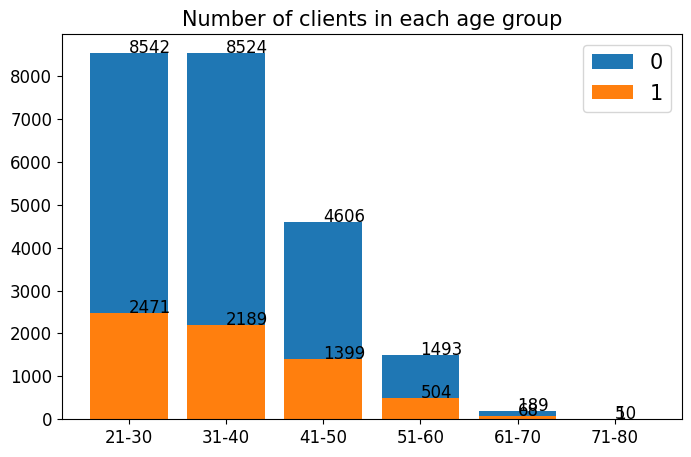

In [ ]:
# Defined bins to group individuals based on their age.
bins = [20,30,40,50,60,70,80]

# Corresponding labels for each age group.
names = ['21-30','31-40','41-50','51-60','61-70','71-80']

# Creating a new column 'AGE_BIN' to store the age group for each individual.
df['AGE_BIN'] = pd.cut(x=df.AGE, bins=bins, labels=names, right=True)

# Counting the number of individuals in each age group.
age_cnt = df.AGE_BIN.value_counts()

# Counting the number of individuals in each age group who defaulted ('def_pay' == 1) and who didn't ('def_pay' == 0).
age_0 = (df.AGE_BIN[df['def_pay'] == 0].value_counts())
age_1 = (df.AGE_BIN[df['def_pay'] == 1].value_counts())

# Creating a bar plot to visualize the distribution of individuals in each age group.
plt.subplots(figsize=(8,5))
plt.bar(age_0.index, age_0.values, label='0')
plt.bar(age_1.index, age_1.values, label='1')

for x,y in zip(names,age_0):
    plt.text(x,y,y,fontsize=12)
for x,y in zip(names,age_1):
    plt.text(x,y,y,fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.title("Number of clients in each age group", fontsize=15)

plt.legend(loc='upper right', fontsize=15)

plt.show()


In [ ]:

# Performing Ridge regression as the data is distributed evenly across the data set
df_X = df[['SEX', 'MARRIAGE', 'AGE', 'BILL_AMT1', 'EDUCATION', 'PAY_2']]
df_y = df.def_pay

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=20)

model1 = RidgeClassifier()
model1.fit(X_train, y_train)

y_pred = model1.predict(X_test)
y_train_pred = model1.predict(X_train)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nTest Accuracy Score for model: ', accuracy_score(y_pred, y_test))
print('\nTrain Accuracy Score for model: ', accuracy_score(y_train_pred, y_train))

# Converting the data to sets for comparison
X_train_set = set(map(tuple, X_train.values))
X_test_set = set(map(tuple, X_test.values))

# Calculating Jaccard similarity
intersection = len(X_train_set.intersection(X_test_set))
union = len(X_train_set.union(X_test_set))
jaccard_similarity = intersection / union

print('\nJaccard Similarity between training and testing data:', jaccard_similarity)


              precision    recall  f1-score   support

           0       0.99      0.78      0.88      8850
           1       0.04      0.59      0.08       150

    accuracy                           0.78      9000
   macro avg       0.52      0.69      0.48      9000
weighted avg       0.98      0.78      0.86      9000

[[6942 1908]
 [  61   89]]

Test Accuracy Score for model:  0.7812222222222223

Train Accuracy Score for model:  0.7816666666666666

Jaccard Similarity between training and testing data: 0.010592996656695407


In [ ]:
# Checking if the features (X) and labels (y) in the train and test sets are the same
features_same = X_train.equals(X_test)
labels_same = y_train.equals(y_test)

if features_same and labels_same:
    print("The train and test data are the same.")
else:
    print("The train and test data are not the same.")

The train and test data are not the same.


### Q7. Do the training and test sets have the same data?

No, both do not have much similarity.

The algorithms utilized in this code were referenced from the official Scikit-learn documentation. Visualizations were created using both Matplotlib's official documentation and examples from Scikit-learn. When needed, explanations and interpretations were enhanced with insights from the official documentation of Eli5.

**References**

1. Scikit-learn Official Documentation:
   - [https://scikit-learn.org/stable/documentation.html](https://scikit-learn.org/stable/documentation.html)

2. ELI5 Official Documentation:
   - [https://eli5.readthedocs.io/en/latest/](https://eli5.readthedocs.io/en/latest/)

3. Ridge Regression in Scikit-learn:
   - [https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

4. RandomForestRegressor in Scikit-learn:
   - [https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

5. Matplotlib `pyplot.subplots` Documentation:
   - [https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html]